## Ecossia photofiltering machine learning project
This notebook aims to build an end-to-end binary classification of image using Tensorflow 2.9 and Tensorflowhub by developing a machine learning algorithm capable of predicting between a "good" photo and a "bad" photo.

1. Problem

Identifying between a "good" photo that clearly shows one tree that was recently planted as part of the project and "Bad" photos that don't serve the purpose of planting proofs 🙂, given a tree image.

2. Data

The data we are using is from the uploaded photos from the Ecossia organization search engine.

3. Evaluation

If we can reach 85% accuracy in predicting whether or not a photo is good or bad during proof of concept. The evaluation is the probability prediction for each photo of a tree planting project that is uploaded.

4. Features

Some information about the data:

We are dealing with labelled photos(structured data)
 so its probably we use supervised learning.

There are only two category of photos (this means its a binary classification)

There are around 10,000+ images for the training set(these images have labels) and testing set(these images don't have labels since we would like to predict them)

## Getting our workspace ready

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import Tensorflow into colab
import tensorflow as tf
import tensorflow_hub as hub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#Model fromScikit_learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import  RandomForestClassifier
# Model Evaluation
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import plot_roc_curve 

import matplotlib.pyplot as plt 
import PIL
import tensorflow as tf
import os
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

import pandas as pd
import requests # to get image from the web
import shutil # to save it locally
import time
import numpy as np


## Getting our data ready (turning into tensors)
with all the machine learning models our data has to be in numerical format.So we will turn our imaegs into Tensors(numerical representation)

## Accessing the data
Now the data file we're working with is available on our Google Drive, we can start to check it out.


In [ ]:
!unzip "drive/MyDrive/Good/good-20221130T134456Z-001.zip" -d "drive/MyDrive/images/Photos/"

In [ ]:
!unzip "drive/MyDrive/images/Photos/Good Photos/good-20221130T134456Z-001.zip" -d "drive/MyDrive/Good Photos/"

Archive:  drive/MyDrive/Good Photos/good-20221130T134456Z-001.zip


In [ ]:
!pip install ipython-autotime
%load_ext autotime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 4.9 MB/s 
time: 442 µs (started: 2022-12-08 02:17:29 +00:00)


In [ ]:
import numpy as np
a = np.array([[1,2,3,4,5],
              [4,5,6,7,8]])
a.ndim

2

time: 6.86 ms (started: 2022-12-08 02:17:29 +00:00)


In [ ]:
# How do I convert Matrix to vector?-flatten()
a.flatten()

array([1, 2, 3, 4, 5, 4, 5, 6, 7, 8])

time: 10.8 ms (started: 2022-12-08 02:17:29 +00:00)


In [ ]:
# Preprocessing
# 1.Resize
# 2.Flatten
import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize
from PIL import Image
import imageio
import os, sys
from PIL import Image
from send2trash import send2trash
import imageio
import io
target=[]
images=[]
flat_data =[]
DATADIR ='/content/drive/MyDrive/Photos'
CATEGORIES=['bad','good']
for category in CATEGORIES:
  class_num =CATEGORIES.index(category)# Label Encoding the values
  path=os.path.join(DATADIR,category)# Create a path to use all the images
  for img in os.listdir(path):
    img_array =imread(os.path.join(path,img))
    img_resized=resize(img_array,(150,150,3))
    flat_data.append(img_resized.flatten())
    images.append(img_resized)
    target.append(class_num)


flat_data = np.array(flat_data)
target = np.array(target)
target.flatten()
images=np.array(images)
     
     
         
       

         


    

    
            


      

 
            
  
    


    

  



time: 20.8 s (started: 2022-12-08 02:17:29 +00:00)


In [ ]:
flat_data
len(flat_data)

400

time: 18.9 ms (started: 2022-12-08 02:17:50 +00:00)


In [ ]:
target.flatten()

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

time: 5.72 ms (started: 2022-12-08 02:17:50 +00:00)


In [ ]:
np.unique(target,return_counts=True)

(array([0, 1]), array([200, 200]))

time: 13.7 ms (started: 2022-12-08 02:17:50 +00:00)


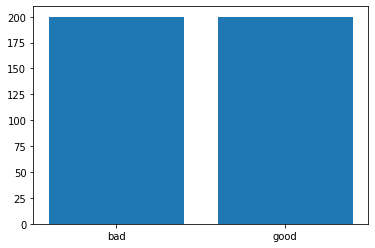

time: 326 ms (started: 2022-12-08 02:17:50 +00:00)


In [ ]:
unique,count=np.unique(target,return_counts=True)
plt.bar(CATEGORIES,count);

In [ ]:
# Split data into Training and testing
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(flat_data,target,test_size=0.3,random_state=42)


time: 81.9 ms (started: 2022-12-08 02:17:50 +00:00)


In [ ]:
y_train

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0])

time: 6.01 ms (started: 2022-12-08 02:17:50 +00:00)


In [ ]:
y_test

array([1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1])

time: 5.99 ms (started: 2022-12-08 02:17:50 +00:00)


In [ ]:
# put models in a dictionary
models={"Logistic Regression": LogisticRegression(),
       "KNN":KNeighborsClassifier(),
       "Random Forest":RandomForestClassifier()}

# Create a function to fit and score models
def fit_and_score(models,x_train,x_test,y_train,y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    x_train : training data (no labels)
    x_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    
    # Set random seed
    np.random.seed(42)
    # make  a dictionary to keep model scores
    model_scores={}
    # Loop through models
    for name,model in models.items():
        # Fit the model to the data
        model.fit(x_train,y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name]=model.score(x_test,y_test)
    
    return model_scores

time: 2.49 ms (started: 2022-12-08 02:17:50 +00:00)


In [ ]:
model_scores = fit_and_score(models=models,
                            x_train=x_train,
                            x_test=x_test,
                            y_train=y_train,
                            y_test=y_test)
model_scores

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.7166666666666667,
 'KNN': 0.625,
 'Random Forest': 0.75}

time: 10.2 s (started: 2022-12-08 02:17:50 +00:00)


## Model comparison

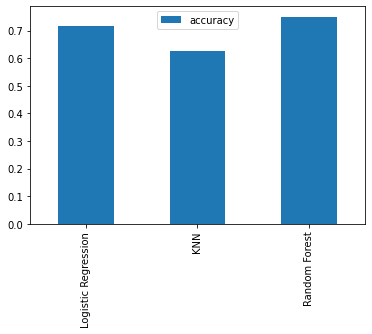

time: 181 ms (started: 2022-12-08 02:18:01 +00:00)


In [ ]:
model_compare=pd.DataFrame(model_scores,index=["accuracy"])
model_compare.T.plot.bar();

 Now we have got a baseline model...and we know that a model's first predictions aren't always what we should based our next step off ,,,what should we do?

Let's look at the following:

Hyperparameter tuning
Feature importance
Confusion matrix
cross validation
precision
recall
f1 score
classification report
ROC curve
Area under the curve(AUC)

## Hyperparameter tuning

In [ ]:
# Let's tune KNN
train_scores=[]
test_scores=[]
# create a list of different values for n_neighbours
neighbors = range(1,21)

# setup KNN instance
knn=KNeighborsClassifier()

#Loop through different n_neighbours
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # Fit the algorithm
    knn.fit(x_train,y_train)
    
    #Update the training scores list
    train_scores.append(knn.score(x_train,y_train))
    
    #update the test scores list
    test_scores.append(knn.score(x_test,y_test))

time: 16.6 s (started: 2022-12-08 02:18:01 +00:00)


Maximum KNN score on the test data:67.50%


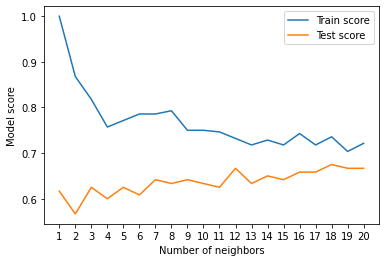

time: 410 ms (started: 2022-12-08 02:18:17 +00:00)


In [ ]:
plt.plot(neighbors,train_scores,label="Train score")
plt.plot(neighbors,test_scores,label="Test score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data:{max(test_scores)*100:.2f}%")

## Hyperparameter tuning with RandomizedSearchCV
we are going to tune:

.  LogisticRegression()

.  RandomForestClassifier()

...using RandomizedSearchCV

In [ ]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid={"C":np.logspace(-4,4,20),
              "solver":["liblinear"]}
# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators":np.arange(10,1000,50),
          "max_depth":[None,3,5,10],
          "min_samples_split":np.arange(2,20,2),
          "min_samples_leaf":np.arange(1,20,2)}

time: 3.19 ms (started: 2022-12-08 02:18:18 +00:00)


In [ ]:
# Tune logisticRegression

np.random.seed(42)

# Setup random hyperparameters search for logisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions=log_reg_grid,
                               cv=5,
                               n_iter=5,
                               verbose=True)
#Fit random hyperparameters search model for LogisticRegression
rs_log_reg.fit(x_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=5,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

time: 2min 21s (started: 2022-12-08 02:18:18 +00:00)


In [ ]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.0001}

time: 3.55 ms (started: 2022-12-08 02:20:40 +00:00)


In [ ]:
rs_log_reg.score(x_test,y_test)

0.6916666666666667

time: 27.4 ms (started: 2022-12-08 02:20:40 +00:00)


Now we've tuned LogisticRegression() lets do the same for RandomForestClassifier()...

In [ ]:
# Setup the random seed
np.random.seed(42)

# Setup random hyperparameters search for RandomForestClassifier
rs_rf=RandomizedSearchCV(RandomForestClassifier(),
                        param_distributions=rf_grid,
                        cv=5,
                        n_iter=5,
                        verbose=True)
# Fit the random hyperparameter search model for RandomForestClassifier()
rs_rf.fit(x_train,y_train)
                        

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

time: 2min 40s (started: 2022-12-08 02:20:40 +00:00)


In [ ]:
# Find the best hyperparameters
rs_rf.best_params_

{'n_estimators': 510,
 'min_samples_split': 18,
 'min_samples_leaf': 19,
 'max_depth': 5}

time: 6.42 ms (started: 2022-12-08 02:23:20 +00:00)


In [ ]:
# Evaluate the Randomized search RandomForestClassifier model
rs_rf.score(x_test,y_test)

0.7333333333333333

time: 130 ms (started: 2022-12-08 02:23:20 +00:00)


In [ ]:
y_pred=rs_rf.predict(x_test)
y_pred

array([1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1])

time: 94.6 ms (started: 2022-12-08 02:23:20 +00:00)


In [ ]:
y_test

array([1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1])

time: 7.19 ms (started: 2022-12-08 02:23:20 +00:00)


In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(y_pred,y_test)

0.7333333333333333

time: 10.2 ms (started: 2022-12-08 02:23:21 +00:00)


In [ ]:
confusion_matrix(y_pred,y_test)

array([[40, 10],
       [22, 48]])

time: 7.64 ms (started: 2022-12-08 02:23:21 +00:00)


In [ ]:
# Save the model using pickle library
import pickle
pickle.dump(rs_rf,open('rs_rf.pkl','wb'))

time: 35.8 ms (started: 2022-12-08 02:23:21 +00:00)


In [ ]:
# Loading the model
import pickle
model=pickle.load(open('rs_rf.pkl','rb'))

time: 21 ms (started: 2022-12-08 02:23:21 +00:00)


Enter your file folder/content/drive/MyDrive/Resized Test dataset/Test dataset/73d9fa2f21cef1ce4cd54bc94b67424f.jpg
(640, 427, 3)
PREDICTED OUTPUT:good
resultgood


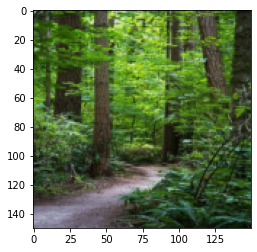

time: 13.6 s (started: 2022-12-08 01:03:38 +00:00)


In [ ]:
flat_data=[]
img = input('Enter your image url')
img = imread(img)
img_resized = resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data=np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out = model.predict(flat_data)
y_out = CATEGORIES[y_out[0]]
print(f'PREDICTED OUTPUT:{y_out}')
y_out=input('result')
data = io.StringIO(y_out)
df = pd.read_csv(data, sep=",")
df.to_excel("prediction.xlsx")

  


 

In [ ]:
plt.figure(figsize=(20,20))
good_folder = r'/content/drive/MyDrive/Photos/good'
for i in range(5):
  file=random.choice(os.listdir(good_folder))
  image_path=os.path.join(good_folder,file)
  img=mpimg.imread(image_path)
  print(img.shape)

In [ ]:
!pip install streamlit
!pip install pyngrok
from pyngrok import ngrok

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.2 MB 4.4 MB/s 
     |████████████████████████████████| 182 kB 69.2 MB/s 
     |████████████████████████████████| 4.7 MB 40.1 MB/s 
     |████████████████████████████████| 237 kB 16.2 MB/s 
     |████████████████████████████████| 78 kB 6.4 MB/s 
     |████████████████████████████████| 164 kB 59.5 MB/s 
     |████████████████████████████████| 62 kB 979 kB/s 
     |████████████████████████████████| 51 kB 3.0 MB/s 
  Created wheel for validators: filename=validators-0.20.0-py3-none-any.whl size=19581 sha256=add380d7fcc926ece1dfaae3a13c5c36a27af21fa1d75c3a25617af862b4c5a0
  Stored in directory: /root/.cache/pip/wheels/19/09/72/3eb74d236bb48bd0f3c6c3c83e4e0c5bbfcbcad7c6c3539db8
Successfully built validators
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 761 kB 5.

In [ ]:

import streamlit as st
import numpy as np
from skimage.io import imread
from skimage.transform import resize
import pickle
from PIL import Image
import zipfile

time: 1 s (started: 2022-12-08 02:23:39 +00:00)


In [ ]:
%%writefile app.py
import numpy as np
import zipfile
from skimage.io import imread
from skimage.transform import resize
from PIL import Image
import streamlit as st
st.title('Photofilter for Ecosia')
st.text('Upload the Image')
import pickle

model=pickle.load(open('rs_rf.pkl','rb'))

uploaded_file = st.file_uploader("Choose an image...",type="jpg",accept_multiple_files=False)
if uploaded_file is not None:
  img=Image.open(uploaded_file)
  st.image(img,caption='Uploaded Image')
  if st.button('PREDICT'):
    CATEGORIES=['bad','good']
    st.write('Result...')
    flat_data = []
    img = np.array(img)
    img_resized = resize(img,(150,150,3))
    flat_data.append(img_resized.flatten())
    flat_data = np.array(flat_data)
    y_out = model.predict(flat_data)
    y_out = CATEGORIES[y_out[0]]
    st.title(f'PREDICTED OUTPUT:{y_out}')
    result=y_out
    st.download_button(label='Download Results',data=result,file_name='myresults.xlsx')
    
    

      




    
  





    




Overwriting app.py
time: 3.74 ms (started: 2022-12-08 02:26:50 +00:00)
